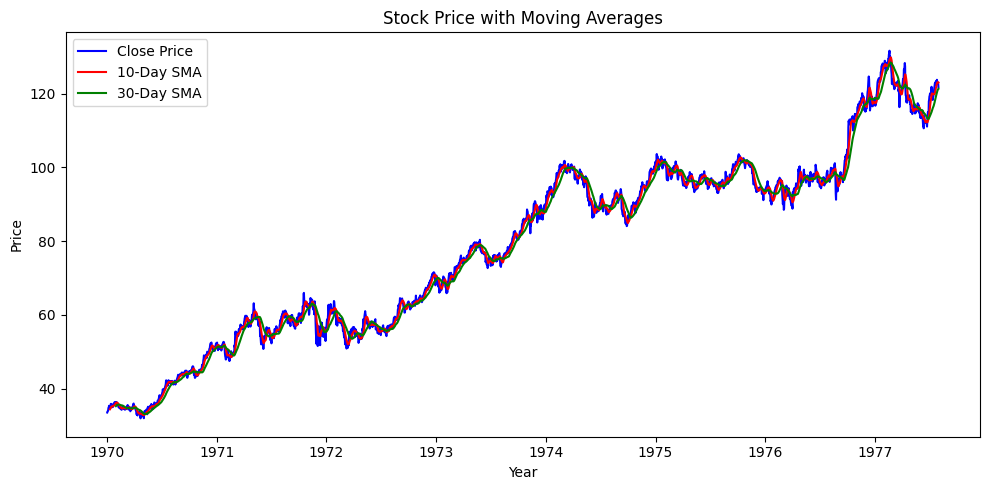

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load data
df = pd.read_csv("p1.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# SMAs
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_10'], label='10-Day SMA', color='red')
plt.plot(df.index, df['SMA_30'], label='30-Day SMA', color='green')

plt.title('Stock Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# ✅ FIX x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


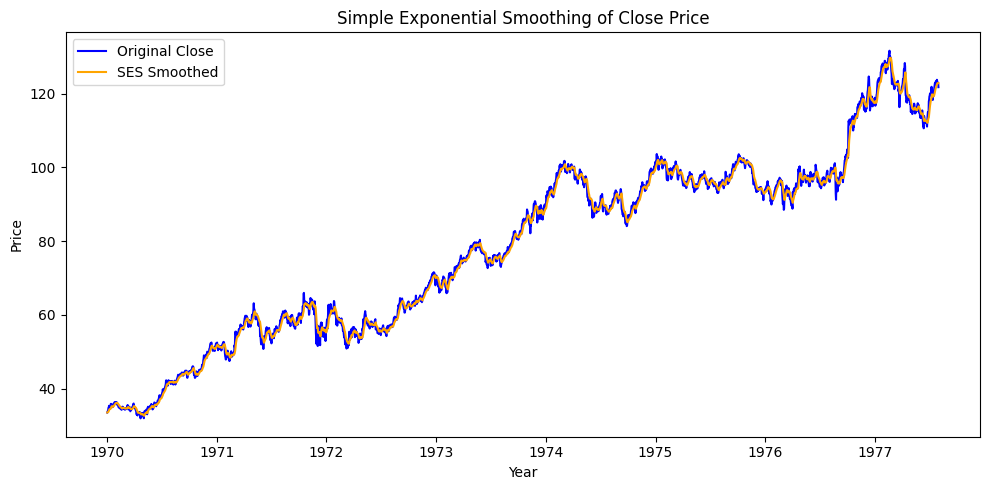

In [8]:
# SES
ses_model = SimpleExpSmoothing(df['Close']).fit(
    smoothing_level=0.2,
    optimized=False
)
df['SES'] = ses_model.fittedvalues

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label='Original Close', color='blue')
plt.plot(df.index, df['SES'], label='SES Smoothed', color='orange')

plt.title('Simple Exponential Smoothing of Close Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# ✅ FIX x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()
